# Boilerplate

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Clonamos el repo para usar el codigo de la lib
!git clone https://github.com/elsonidoq/ml-practico-2022.git
!cd ml-practico-2022; git pull

fatal: destination path 'ml-practico-2022' already exists and is not an empty directory.
Already up to date.


In [3]:
import sys
sys.path.append('ml-practico-2022')

In [4]:
from lib import data
from pathlib import Path
import pandas as pd


PATH = Path('/content/gdrive/My Drive/ml-practico-data/')

ratings_df = data.load_title_ratings(PATH)
basics_df = data.load_title_basics(PATH)
principals_df = pd.read_csv(PATH / 'title.principals.tsv.gz', sep='\t')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


# Recordemos como era la data

In [5]:
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [6]:
principals_df.category.value_counts()

actor                  11279111
self                    8849657
actress                 8658481
writer                  7029439
director                5860057
producer                3274623
cinematographer         1766674
composer                1745098
editor                  1689718
production_designer      344620
archive_footage          324176
archive_sound              3253
Name: category, dtype: int64

In [7]:
principals_df[principals_df.tconst == 'tt0120338']

,tconst,ordering,nconst,category,job,characters
1028555,tt0120338,10,nm0365239,editor,\N,\N
1028556,tt0120338,1,nm0000138,actor,\N,"[""Jack Dawson""]"
1028557,tt0120338,2,nm0000701,actress,\N,"[""Rose Dewitt Bukater""]"
1028558,tt0120338,3,nm0000708,actor,\N,"[""Cal Hockley""]"
1028559,tt0120338,4,nm0000870,actress,\N,"[""Molly Brown""]"
1028560,tt0120338,5,nm0000116,director,\N,\N
1028561,tt0120338,6,nm0484457,producer,producer,\N
1028562,tt0120338,7,nm0000035,composer,\N,\N
1028563,tt0120338,8,nm0005665,cinematographer,director of photography,\N
1028564,tt0120338,9,nm0119322,editor,\N,\N


## Distribución de cantidad de peliculas por nconst

In [8]:
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905.0,\N,100.0,[no-genre]
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,\N,70.0,"[Action, Adventure, Biography]"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907.0,\N,90.0,[Drama]
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908.0,\N,120.0,"[Adventure, Fantasy]"
1172,tt0001184,movie,Don Juan de Serrallonga,Don Juan de Serrallonga,0,1910.0,\N,58.0,"[Adventure, Drama]"


In [9]:
# Nos vamos a quedar solo con principals de las peliculas que nos interesan
# Posiblemente de cosas diferentes 
movie_principals_df = principals_df[principals_df.tconst.isin(set(basics_df.tconst.unique()))]

In [10]:
len(movie_principals_df) / len(principals_df)

0.09276992872805453

### Distribucion de cantidad de peliculas por persona

Text(0.5, 1.0, 'Number of films per person')

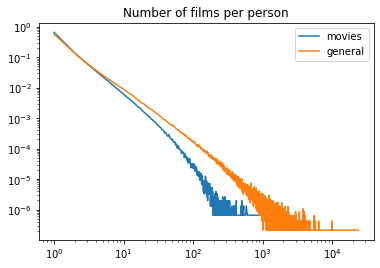

In [11]:
import matplotlib.pyplot as plt

(
    movie_principals_df
        .nconst
        .value_counts()
        .value_counts(normalize=True)
        .sort_index()
        .plot(logx=True, logy=True, label='movies')
)
(
    principals_df
        .nconst
        .value_counts()
        .value_counts(normalize=True)
        .sort_index()
        .plot(logx=True, logy=True, label='general')
)

plt.legend(loc='best')
plt.title('Number of films per person')

### Relación con ratings

Experimento: vamos a ver ejemplos claros

In [12]:
movie_principals_df = movie_principals_df.merge(ratings_df, on='tconst')

In [13]:
movie_principals_df.head()

,tconst,ordering,nconst,category,job,characters,averageRating,numVotes
0,tt0000502,1,nm0215752,actor,\N,\N,4.5,14
1,tt0000502,2,nm0252720,actor,\N,\N,4.5,14
2,tt0000502,3,nm0063413,director,\N,\N,4.5,14
3,tt0000502,4,nm0657268,writer,\N,\N,4.5,14
4,tt0000502,5,nm0675388,writer,\N,\N,4.5,14


In [14]:
person_metadata = (
    movie_principals_df[movie_principals_df.numVotes > 1000]
        .groupby('nconst')
        .agg(
            n_films=('tconst', 'count'), 
            avg_rating=('averageRating', 'mean'),
            max_rating=('averageRating', 'max'),
            min_rating=('averageRating', 'min'),
    )
)

In [15]:
cohort = (person_metadata.n_films > 10) & (person_metadata.n_films < 30)

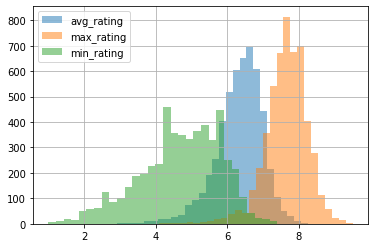

In [16]:
person_metadata[cohort].avg_rating.hist(bins=30, alpha=0.5, label='avg_rating')
person_metadata[cohort].max_rating.hist(bins=30, alpha=0.5, label='max_rating')
person_metadata[cohort].min_rating.hist(bins=30, alpha=0.5, label='min_rating')

plt.legend(loc='best')

# Parece haber señal, veamos ejemplos puntuales

In [17]:
person_metadata['link'] = (
    person_metadata.index.to_series().apply(lambda nconst: f'<a href="https://www.imdb.com/name/{nconst}">link</a>')
)

In [18]:
from IPython.display import HTML

HTML(
    person_metadata[cohort]
        .sort_values('min_rating', ascending=False)[:200]
        .sample(10)
        .to_html(escape=False)
)

,n_films,avg_rating,max_rating,min_rating,link
nconst,,,,,
nm0000399,16,7.781250,8.8,6.4,link
nm0319574,13,7.138462,7.9,6.4,link
nm0006148,15,6.946667,7.6,6.4,link
nm0611531,12,7.791667,8.5,7.2,link
nm0300064,27,7.322222,8.1,6.5,link
nm1041999,14,6.871429,7.9,6.4,link
nm0858128,16,8.250000,9.0,7.2,link
nm0466153,14,7.314286,8.0,6.5,link
nm0767022,13,7.207692,7.9,6.6,link


#### Es dificil mirando casos puntuales al azar

Vamos a ver como quedan gente occidental y reciente tomando de punto de partida algunas peliculas conocidas

Primero vamos a calcular quienes son actores y actrices como profesion / rol principal

In [19]:
category_frequency = (
    movie_principals_df
    .groupby(['nconst', 'category'])
    .tconst
    .count()
    .reset_index()
    .rename(columns={'tconst': 'n_films'})
    .sort_values(['nconst', 'n_films'], ascending=[True, False])
)
category_frequency['rank'] = (
    category_frequency
    .groupby(['nconst'])
    .cumcount()
)

In [20]:
category_frequency.head(15)

,nconst,category,n_films,rank
0,nm0000001,actor,40,0
1,nm0000001,archive_footage,19,1
2,nm0000001,self,18,2
3,nm0000002,actress,44,0
5,nm0000002,self,27,1
4,nm0000002,archive_footage,24,2
6,nm0000003,actress,35,0
7,nm0000003,archive_footage,17,1
8,nm0000003,self,7,2
10,nm0000004,archive_footage,19,0


In [21]:
performing_people = category_frequency[
    (category_frequency['rank']==0) & (category_frequency.category.isin(['actor', 'actress']))
].nconst

In [22]:
good_movies = [
    'tt0120338',  # titanic
    'tt0110912',  # pulp fiction
    'tt0133093',  # matrix
    'tt0109686',  # tonto y re tonto
    'tt0454876',  # life of pi
    'tt0499549',  # avatar
    'tt0087277',  # footloose
]

good_crews = movie_principals_df[
    movie_principals_df.tconst.isin(good_movies) & 
    movie_principals_df.nconst.isin(performing_people)
].nconst.unique()

In [23]:
HTML(
    person_metadata.loc[good_crews]
        .sort_values('min_rating', ascending=False)
        .to_html(escape=False)
)


,n_films,avg_rating,max_rating,min_rating,link
nconst,,,,,
nm4139037,5,6.760000,7.9,6.0,link
nm0001742,4,6.225000,6.6,5.7,link
nm0823563,5,6.380000,7.4,5.4,link
nm0000701,36,6.811111,8.3,5.3,link
nm0000138,41,7.119512,8.8,5.3,link
nm0915989,21,6.771429,8.7,5.1,link
nm0001848,23,6.647826,7.9,5.1,link
nm1300009,10,7.020000,8.1,5.0,link
nm0001475,30,6.333333,7.9,5.0,link


Podemos ver que
* Cambia mucho la validez de la feature en funcion de la cantidad de peliculas

* Si tenes muchas peliculas y el min_count es alto, entonces "sos garantia de exito"